In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [32]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data['target'] = data['target'].astype(int)


In [33]:
# Display the first few rows of the dataset
print("Sample Dataset:")
print(data.head())

Sample Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [34]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


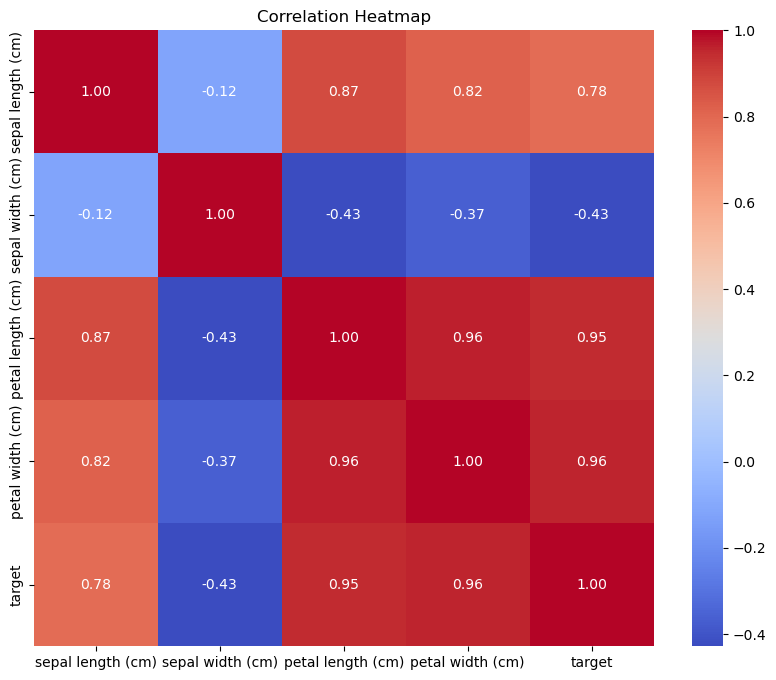

In [35]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
 

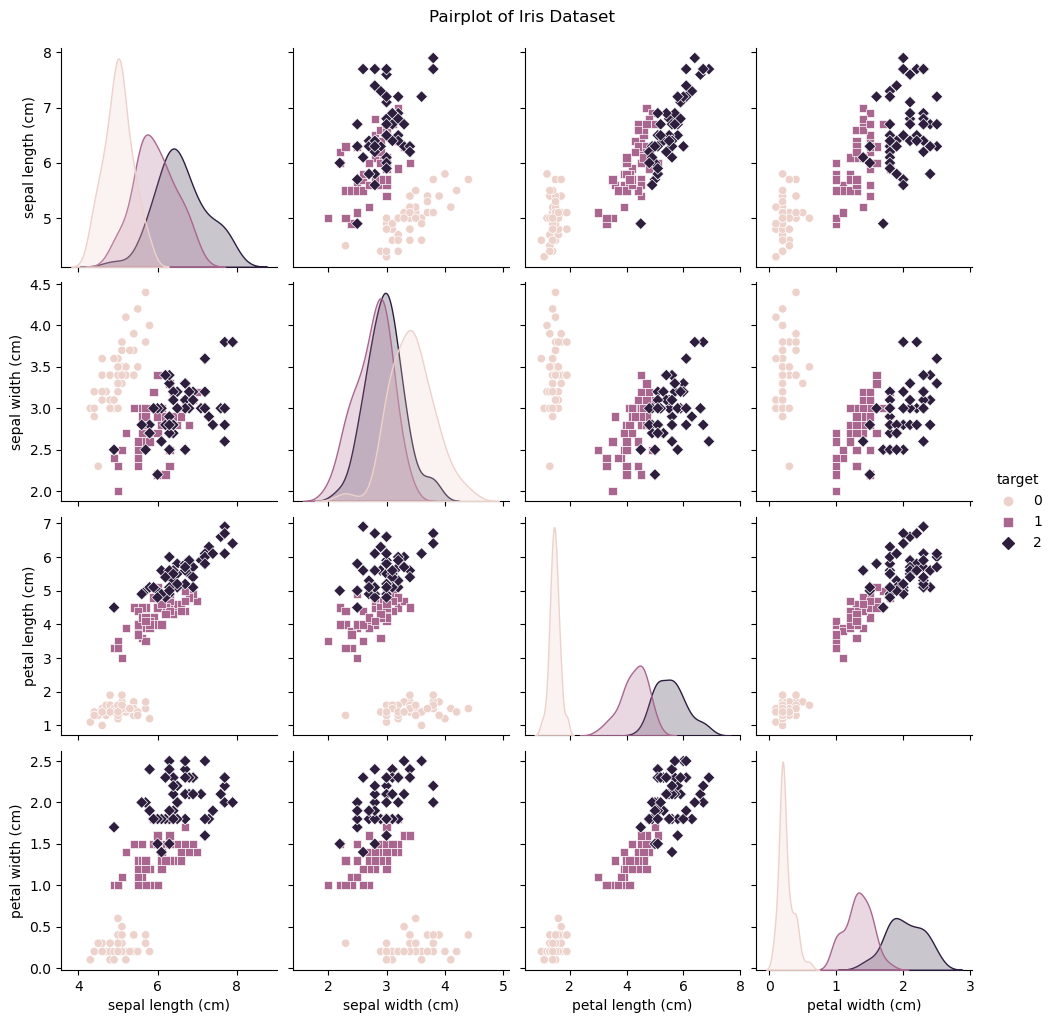

In [36]:
# Pairplot
sns.pairplot(data, hue='target', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

In [37]:
# Train-test split
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

In [38]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
 

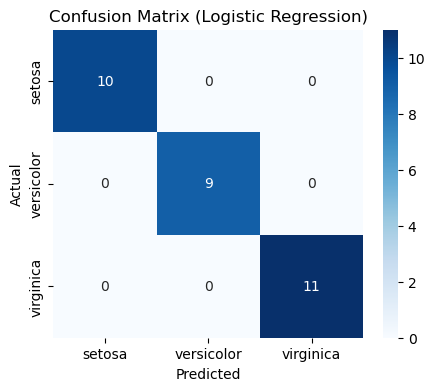

In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
 

In [40]:
# Classification Report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nClassification Report (Logistic Regression):\n", class_report)
 


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [45]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
data['kmeans_cluster'] = cluster_labels



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
# PCA (Principal Component Analysis)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]
 

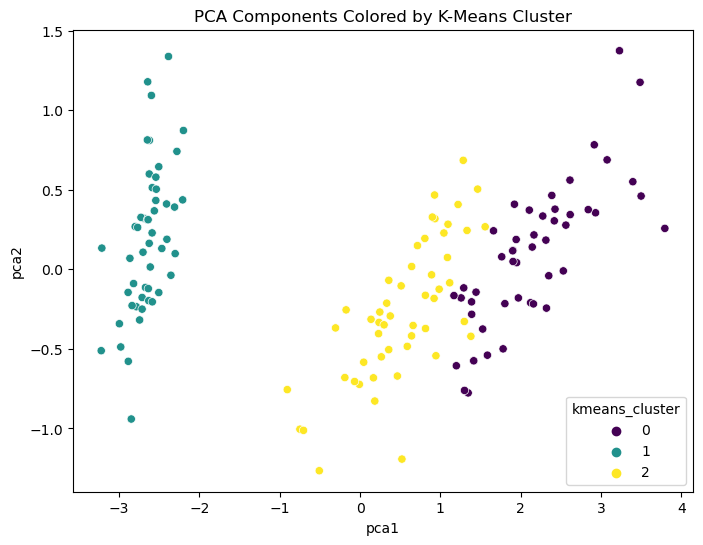

In [43]:
# Scatter plot of PCA components colored by K-Means cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='kmeans_cluster', data=data, palette='viridis', legend='full')
plt.title('PCA Components Colored by K-Means Cluster')
plt.show()